## Assignment 1: Confusion Matrix Metrics

1. Generate a confusion matrix as well as accuracy, precision, recall and f1 scores for the model below

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("/Users/yasaswi/Documents/marlabs/training/datasets/income.csv")

In [42]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = income_model_prep(income)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(" Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print(" Accuracy Score: ",accuracy_score(y_test, y_pred))
print(" Precision Score: ",precision_score(y_test, y_pred))
print(" Recall Score: ",recall_score(y_test, y_pred))
print(" F-1 Score: ",f1_score(y_test, y_pred))

 Confusion Matrix: 
 [[4539  342]
 [ 589  926]]
 Accuracy Score:  0.8544402751719825
 Precision Score:  0.7302839116719243
 Recall Score:  0.6112211221122112
 F-1 Score:  0.6654689184333453


## Assignment 2: Precision Recall Curve and AUC

1. Plot the precison and recall curves for your model. Plot F1 vs. the Threshold - where is F1 maximized?
2. Report accuracy, precision, recall, and F1 at the threshold determined above.
3. Plot an ROC curve for your model and calculate the AUC score. 

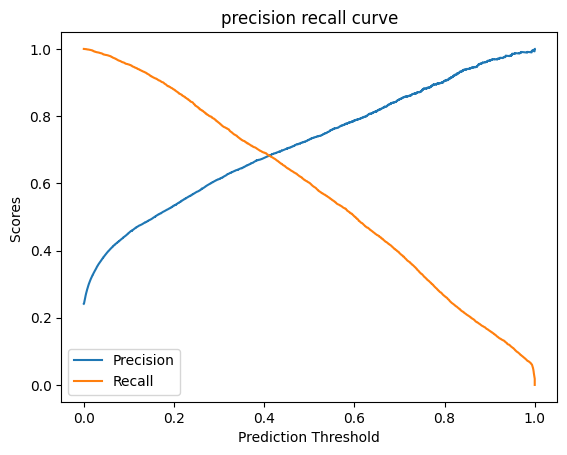

In [44]:
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])
plt.plot(t_curve, p_curve[:-1], label="Precision")
plt.plot(t_curve, r_curve[:-1], label="Recall")
plt.xlabel("Prediction Threshold")
plt.ylabel("Scores ")
plt.legend()
plt.title("precision recall curve")
plt.show()

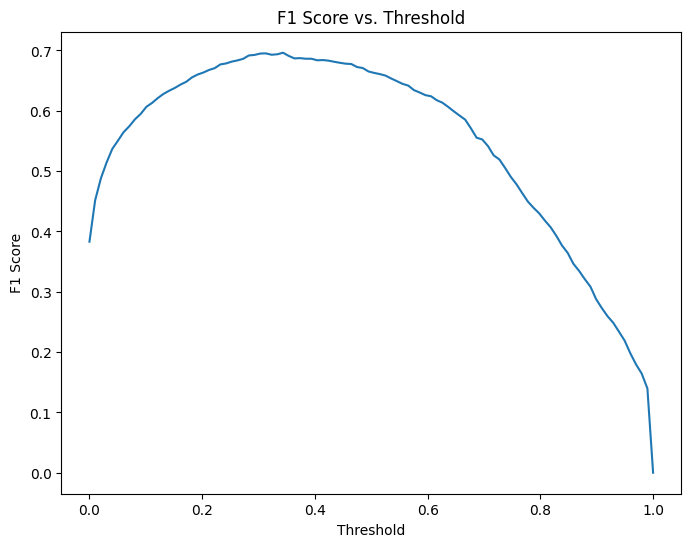

,f1,thresholds
34,0.696260,0.343434
31,0.695172,0.313131
30,0.694881,0.303030
33,0.693694,0.333333
32,0.692899,0.323232
...,...,...
95,0.197985,0.959596
96,0.179641,0.969697
97,0.164350,0.979798
98,0.139620,0.989899


In [45]:
y_probs = lr.predict_proba(X_test)[:,1]
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_probs >= thr)) for thr in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel( 'Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold') 
plt.show()
pd.DataFrame({'f1': f1_scores, 'thresholds': thresholds}).sort_values(by = 'f1', ascending=False)
# F1 is maximum at 0.34

In [46]:
y_pred = lr.predict_proba(X_test)[:,1] >= 0.34
print(" Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print(" Accuracy Score: ",accuracy_score(y_test, y_pred))
print(" Precision Score: ",precision_score(y_test, y_pred))
print(" Recall Score: ",recall_score(y_test, y_pred))
print(" F-1 Score: ",f1_score(y_test, y_pred))
# even though there is little decrease in accuracy, But precision, recall and f1 are improved good.

 Confusion Matrix: 
 [[4241  640]
 [ 367 1148]]
 Accuracy Score:  0.8425578486554096
 Precision Score:  0.6420581655480985
 Recall Score:  0.7577557755775578
 F-1 Score:  0.6951256433545262


AUC score: 0.7705767565078573


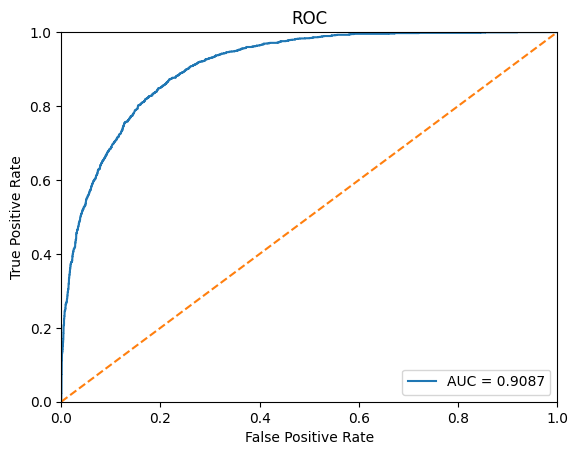

In [47]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
print("AUC score:", roc_auc_score(y_test, lr.predict(X_test)))
probs = lr.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1= roc_curve(y_test, probs)
roc_auc1 = auc(fpr1, tpr1)
plt.title("ROC")
plt.plot(fpr1, tpr1, label="AUC = %0.4f" % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], '--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Assignment 3: MultiClass Metrics

1. Calculate precision & recall by class for the fitted model below on your test data
2. Calculate overall accuracy as well as weighted averages for precision & recall on your test data.

In [48]:
import pandas as pd

credit_df = pd.read_csv("/Users/yasaswi/Documents/marlabs/training/datasets/credit_train_clean.csv").drop(["Name", "SSN"], axis=1)

credit_df.head()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [49]:
from sklearn.model_selection import train_test_split

features = [
    "Age",
    "Month",
    "Annual_Income",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Payment_Behaviour",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month"
]

X = pd.get_dummies(credit_df[features], dtype="int", drop_first=True)
y = credit_df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [50]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.612125
0.6105


In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred=lr.predict(X_test)
print("PRECISION by class: ",precision_score(y_test, y_pred, average=None))
print("RECALL by class: ",recall_score(y_test, y_pred, average=None))
print("Overall Accuracy: ",accuracy_score(y_test, y_pred))

PRECISION by class:  [0.52137267 0.6495608  0.60900592]
RECALL by class:  [0.24068927 0.48323302 0.80608293]
Overall Accuracy:  0.6105


In [52]:
print("Weighted Precision: ",precision_score(y_test, y_pred, average='weighted'))
print("Weighted Recall: ",recall_score(y_test, y_pred, average='weighted'))

Weighted Precision:  0.6050320293854363
Weighted Recall:  0.6105
